<h1>Home_credit_risk_predictions<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-exploration-analysis" data-toc-modified-id="Data-exploration-analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data exploration analysis</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#LGBM-model" data-toc-modified-id="LGBM-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>LGBM model</a></span></li></ul></div>

In [18]:
import shap
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [19]:
data_app = pd.read_csv(
    "/home/natalia/Рабочий стол/new/Home_credit/application_train.csv",
    sep=",",
    encoding="cp1251",
)

## Data exploration analysis

In [20]:
target = data_app["TARGET"]

In [21]:
X = data_app.drop(["SK_ID_CURR", "TARGET"], axis=1)

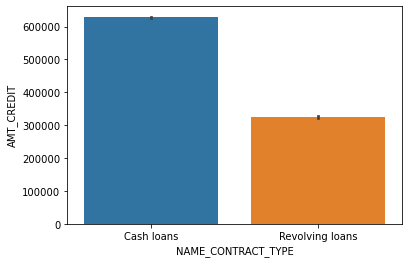

In [22]:
ax_cr = sns.barplot(x="NAME_CONTRACT_TYPE", y="AMT_CREDIT", data=data_app)

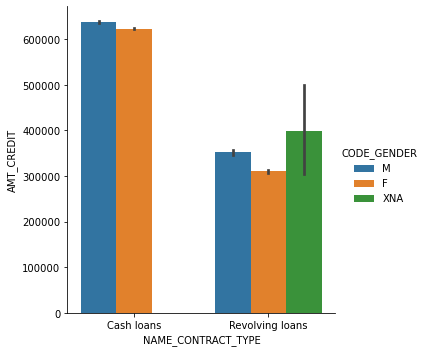

In [23]:
ax_contr = sns.catplot(x="NAME_CONTRACT_TYPE", y="AMT_CREDIT",
                       hue="CODE_GENDER", data=data_app, kind="bar")

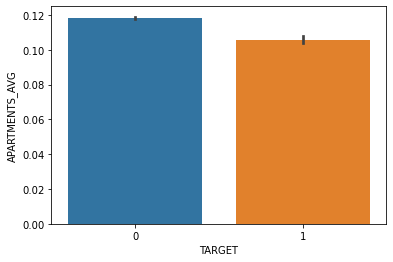

In [24]:
ax_apart = sns.barplot(x="TARGET", y="APARTMENTS_AVG", data=data_app)

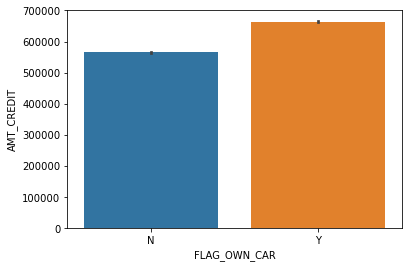

In [25]:
ax_car = sns.barplot(x="FLAG_OWN_CAR", y="AMT_CREDIT", data=data_app)

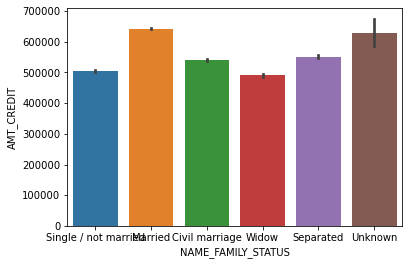

In [26]:
ax_status = sns.barplot(x="NAME_FAMILY_STATUS", y="AMT_CREDIT", data=data_app)

In [27]:
percent_ones = (target.sum())/(target.count())*100
print("percent one", percent_ones)
print("percent zeros", 100 - percent_ones)

percent one 8.072881945686495
percent zeros 91.92711805431351


Text(0, 0.5, 'percent')

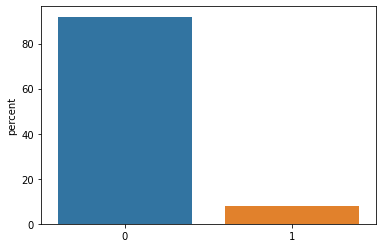

In [28]:
ax = sns.barplot(x=[0, 1], y=[100 - percent_ones, percent_ones])
ax.set_ylabel("target")
ax.set_ylabel("percent")

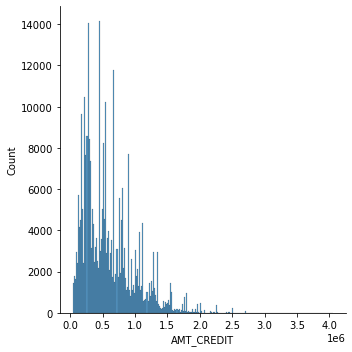

In [29]:
ad = sns.displot(X["AMT_CREDIT"])

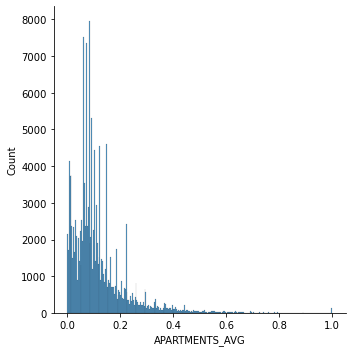

In [30]:
ad1 = sns.displot(X["APARTMENTS_AVG"])

## Data preparation

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3)

In [34]:
cat_features = ["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_TYPE_SUITE",
                "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE",
                "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE", "FONDKAPREMONT_MODE", "HOUSETYPE_MODE",
                "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE"
                ]
params = {"learning_rate": 0.05,
          "num_iterations": 500,
          "max_depth": 7,
          "early_stopping_round": 30,
          }

In [35]:
for feature in cat_features:
    data_app[feature] = data_app[feature].astype("category")

## LGBM model

In [36]:
model = LGBMClassifier(params, objective="binary")

In [37]:
type(X_train)
X_train.dtypes

NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 120, dtype: object

In [38]:
model.fit(X_train, y_train, categorical_feature=cat_features)

Using categorical_feature in Dataset.


ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in the following fields: NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, OCCUPATION_TYPE, WEEKDAY_APPR_PROCESS_START, ORGANIZATION_TYPE, FONDKAPREMONT_MODE, HOUSETYPE_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE

In [ ]:
y_hat = model.predict(X_test)

In [ ]:
score = roc_auc_score(y_test, y_hat)

In [ ]:
explainer = shap.Explainer(model.predict, X_test)

In [ ]:
shap_values = explainer(X_test)

In [ ]:
shap.plots.bar(shap_values)